In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
import os
for dirname, _, filenames in os.walk('..'):
    for filename in filenames:
        varname = filename.split('.')[0]
        exec(varname + " = np.load('../Datasets/X-IIoT-pre-processed/" + filename + "')")

In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((448735, 58), (448735,), (140230, 58), (140230,), (112184, 58), (112184,))

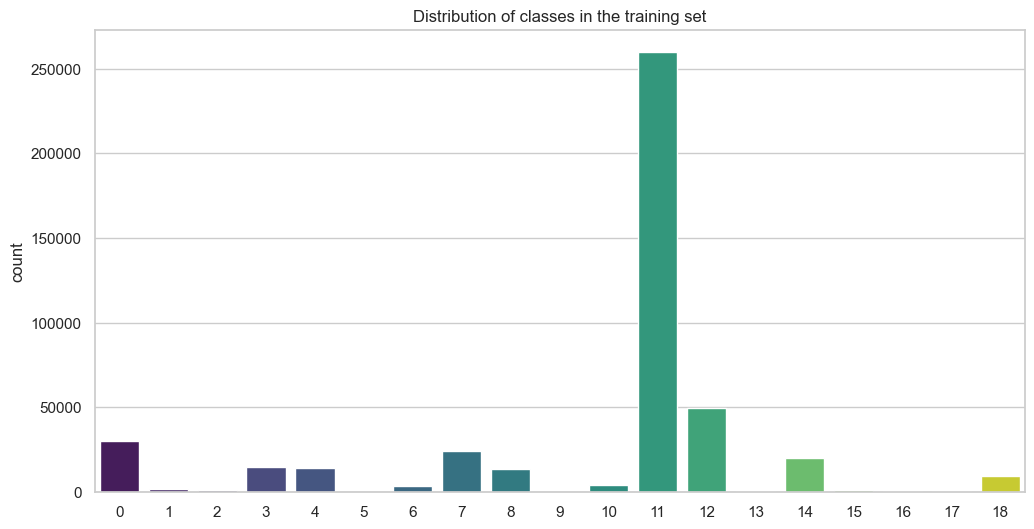

In [5]:
# Plotting the distribution of the classes
# NOT balanced classes
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(x=y_train, palette='viridis')
plt.title('Distribution of classes in the training set')
plt.show()

In [6]:
#Simple SVM classifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3)  # Adjust max_iter, tol if needed
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.91416244740783


In [7]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print('Classification report:')
print(class_report)

Confusion matrix:
[[ 9369     0     0     0     0     0     0     0     0     0     0     1
      0     0     0     0     0     0    28]
 [    0    13     0     0     0     0     0     0     0     0     0   557
      0     0     0     0     0     0     0]
 [    0     0   406     0     0     0     0     0     0     0     0     2
      0     0    11     0     0     0     0]
 [    0     0     0  1204     0     0     0     0     0     0     0  3347
      0     0     0     0     0     0     0]
 [    0     0     0     0  4425     0     0     1     0     0     0     0
      0     0     1     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     1
      0     0     2     0     0     0     2]
 [    0     0     0     0     0     0     5     0     0     0     0  1010
      0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0  7507    66     0     0    16
      0     0     0     0     0     0     0]
 [    0     0     0     0     

/Users/seanfuhrman/opt/anaconda3/envs/cl4ids/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/seanfuhrman/opt/anaconda3/envs/cl4ids/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/seanfuhrman/opt/anaconda3/envs/cl4ids/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

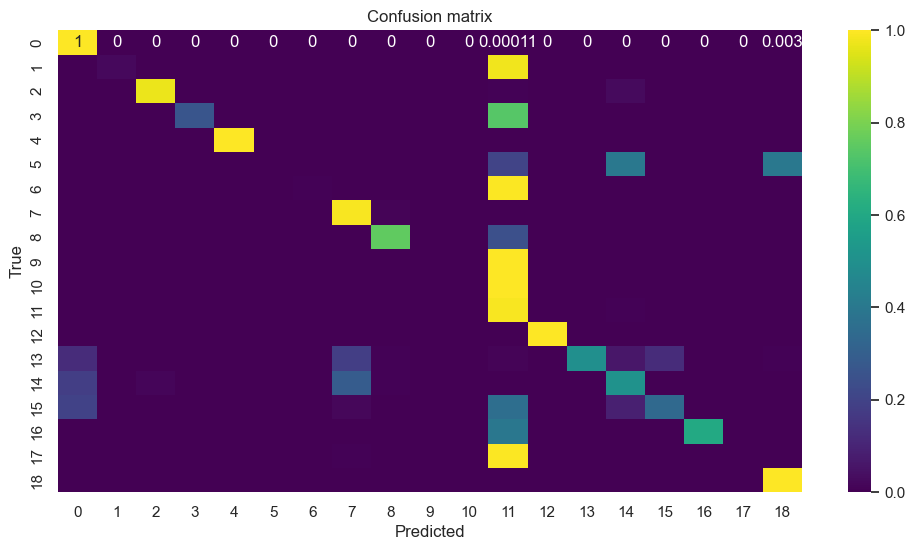

In [11]:
#plot confusion matrix as heatmap
#Shows a lot of missclassifications as 11. Which makes sense with class distribution
norm_conf_matrix = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)
plt.figure(figsize=(12, 6))
sns.heatmap(norm_conf_matrix, annot=True, cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.show()
